In [1]:
# Day 1-2: 向量基礎教學與實作
# 機器學習數學基礎

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 設定中文字體
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

print("=== Day 1-2: 向量基礎教學 ===\n")

# ==========================================
# 1. 向量的建立和基本屬性
# ==========================================

=== Day 1-2: 向量基礎教學 ===



### 學習線性代數或是深度學習的數學運算時，經常需要對高維度的向量、矩陣進行運算。
- 純量 (Scalar) 屬於 0 維
- 向量 (Vector) 屬於 1 維
- 矩陣 (Matrix) 屬於 2 維度
- 超過 3 維就統稱為張量 (Tensor), (當然 Scalar、Vector 與 Matrix 也都可以視為 Tensor）


2D向量: [3 4]
3D向量: [1 2 3]
特徵向量 [價格, 評分, 銷量]: [ 299.     4.5 2000. ]
1d向量維度: 1

2D向量維度:1
2D向量長度: 2
2D向量形狀: (2,)

3D向量維度:1
3D向量長度: 3
3D向量形狀: (3,)


2. 向量加法
------------------------------
a + b = [4 6]


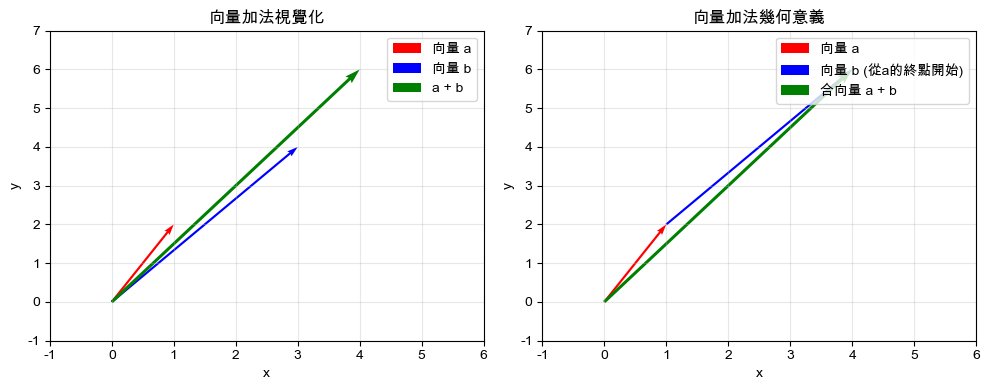

In [2]:
vector_1d = np.array([1])
vector_2d = np.array([3,4]) # 在2D平面上的點(3,4)
vector_3d = np.array([1,2,3]) #在3D空間中的點(1,2,3)
vector_features = np.array([299,4.5,2000]) # 商品特徵：[價格, 評分, 銷量] = [299, 4.5, 1200]



print(f"2D向量: {vector_2d}")
print(f"3D向量: {vector_3d}")
print(f"特徵向量 [價格, 評分, 銷量]: {vector_features}")


print(f"1d向量維度: {vector_1d.ndim}")
print(f"\n2D向量維度:{vector_2d.ndim}")
print(f"2D向量長度: {len(vector_2d)}")
print(f"2D向量形狀: {vector_2d.shape}")

print(f"\n3D向量維度:{vector_3d.ndim}")
print(f"3D向量長度: {len(vector_3d)}")
print(f"3D向量形狀: {vector_3d.shape}")

# ==========================================
# 2. 向量加法
# 規則：對應元素相加
# 幾何意義：向量首尾相接
# ==========================================
print("\n\n2. 向量加法")
print("-" * 30)

a = np.array([1,2])
b = np.array([3,4])

vector_sum = a+b
print(f"a + b = {vector_sum}")

# 視覺化向量加法
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.quiver(0, 0, a[0], a[1], angles='xy', scale_units='xy', scale=1, color='red', width=0.005, label='向量 a')
plt.quiver(0, 0, b[0], b[1], angles='xy', scale_units='xy', scale=1, color='blue', width=0.005, label='向量 b')
plt.quiver(0, 0, vector_sum[0], vector_sum[1], angles='xy', scale_units='xy', scale=1, color='green', width=0.007, label='a + b')
plt.xlim(-1, 6)
plt.ylim(-1, 7)
plt.grid(True, alpha=0.3)
plt.legend()
plt.title('向量加法視覺化')
plt.xlabel('x')
plt.ylabel('y')

# 展示向量加法的幾何意義（向量首尾相接）
plt.subplot(1, 2, 2)
plt.quiver(0, 0, a[0], a[1], angles='xy', scale_units='xy', scale=1, color='red', width=0.005, label='向量 a')
plt.quiver(a[0], a[1], b[0], b[1], angles='xy', scale_units='xy', scale=1, color='blue', width=0.005, label='向量 b (從a的終點開始)')
plt.quiver(0, 0, vector_sum[0], vector_sum[1], angles='xy', scale_units='xy', scale=1, color='green', width=0.007, label='合向量 a + b')
plt.xlim(-1, 6)
plt.ylim(-1, 7)
plt.grid(True, alpha=0.3)
plt.legend()
plt.title('向量加法幾何意義')
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()




3. 純量乘法
------------------------------
原向量 a: [1 2]
純量: 2
2 × a = [2 4]


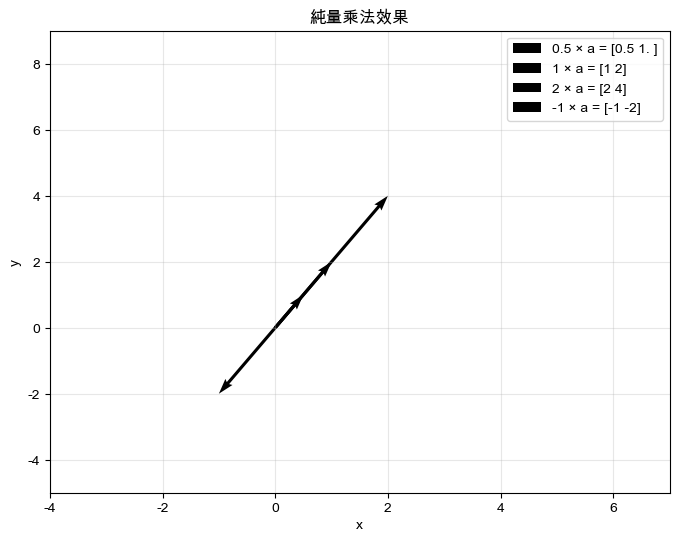

In [3]:
# ==========================================
# 3. 純量乘法
# 規則：每個元素都乘以純量
# 幾何意義：改變向量的長度，方向保持不變（負數時反向）
# ==========================================
print("\n\n3. 純量乘法")
print("-" * 30)

scalar = 2
scaled_vector= scalar * a

print(f"原向量 a: {a}")
print(f"純量: {scalar}")
print(f"{scalar} × a = {scaled_vector}")


# 不同純量的效果
scalars = [0.5, 1, 2, -1]
plt.figure(figsize=(8, 6))

for i ,s in enumerate(scalars):
    scaled = s * a
    plt.quiver(0, 0, scaled[0], scaled[1], angles='xy', scale_units='xy', scale=1, width=0.005, label=f'{s} × a = {scaled}')

plt.xlim(-4, 7)
plt.ylim(-5, 9)
plt.grid(True, alpha=0.3)
plt.legend()
plt.title('純量乘法效果')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


### 點積（內積）
- 定義：a · b = a₁×b₁ + a₂×b₂ + ... + aₙ×bₙ (向量維度必須相同)
- 計算： 
a = [3, 4]
b = [1, 2]
a · b = 3×1 + 4×2 = 3 + 8 = 11  


- 幾何意義： 
    - a · b = |a| × |b| × cos(θ)，其中θ是兩向量夾角
    - 點積為0 → 向量垂直
    - 點積為正 → 夾角小於90°
    - 點積為負 → 夾角大於90°


In [26]:
# ==========================================
# 4. 點積（內積）
# ==========================================
print("\n\n4. 點積（內積）")
print("-" * 30)

a = np.array([1,2])
b = np.array([3,4])

# 1*3 + 2*4 = 11
print(f"a,b內積:{np.dot(a,b)}")






4. 點積（內積）
------------------------------
a,b內積:11


### 向量長度（模）
- 公式：|a| = √(a₁² + a₂² + ... + aₙ²)  
- 例子：  
a = [3, 4]    
|a| = √(3² + 4²) = √(9 + 16) = √25 = 5

In [17]:
matrix_a = np.matrix([[5,6],[7,8]])
print(type(matrix_a))
matrix_a

print(matrix_a.size)
print(matrix_a.shape)

<class 'numpy.matrix'>
4
(2, 2)


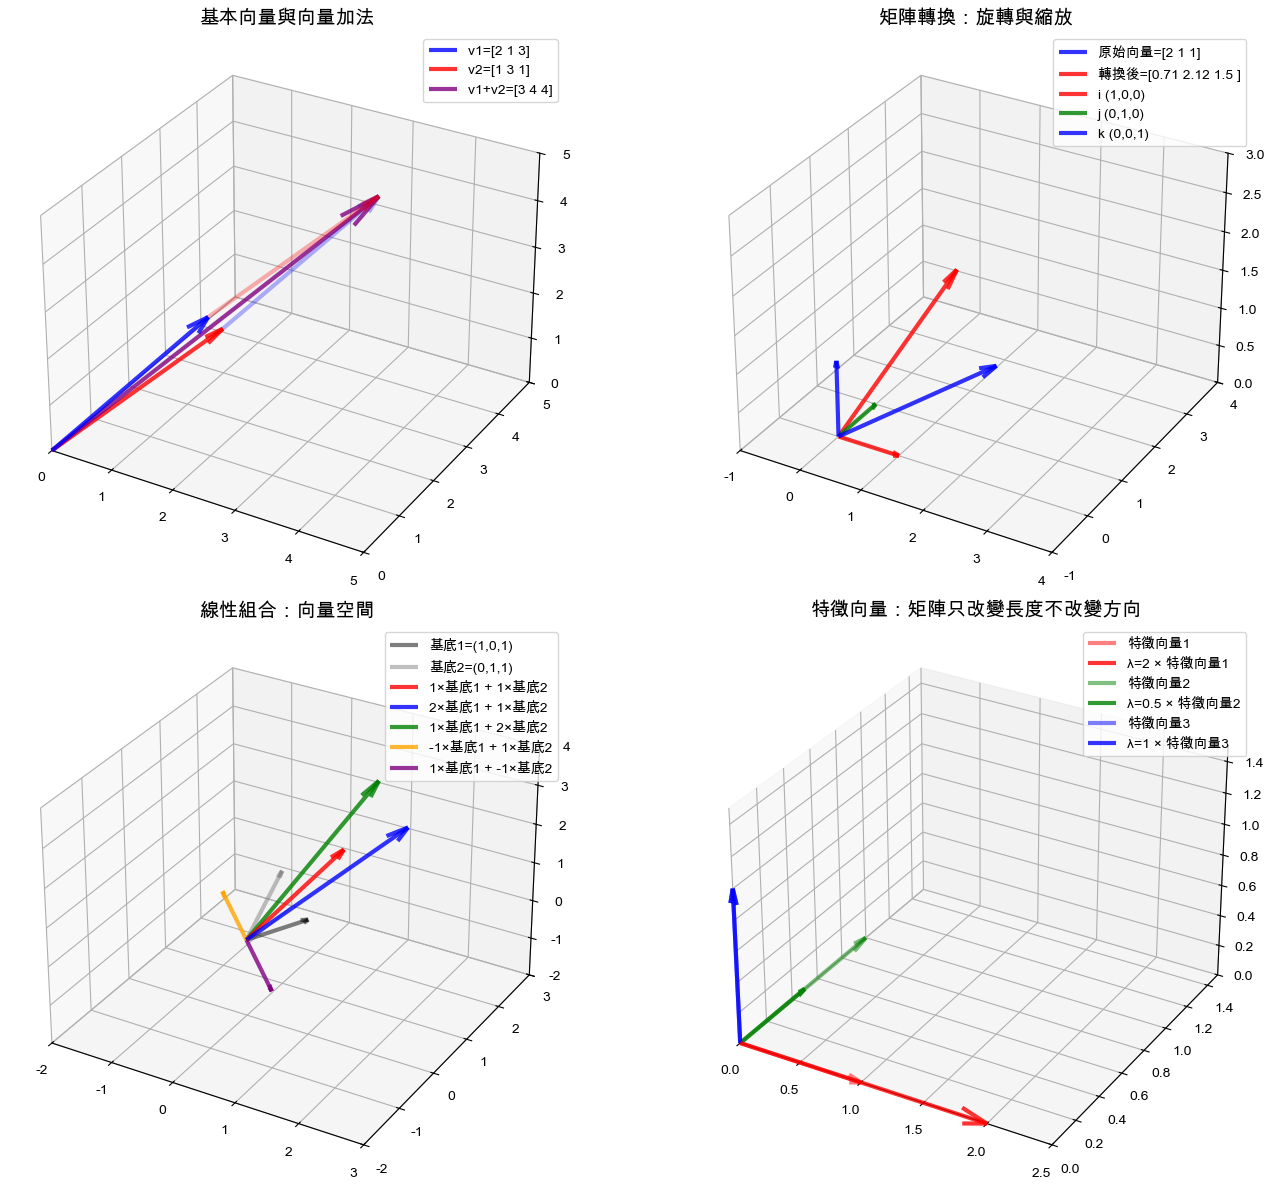

=== 向量運算示範 ===
向量 v1 = [1 2 3]
向量 v2 = [4 5 6]
點積 (內積): v1 · v2 = 32
叉積 (外積): v1 × v2 = [-3  6 -3]
v1 的長度: ||v1|| = 3.742
v2 的長度: ||v2|| = 8.775
兩向量間的角度: 12.93 度


In [4]:

def plot_vector(ax, vector, origin=[0,0,0], color='red', label='', alpha=0.8):
    """繪製3D向量"""
    ax.quiver(origin[0], origin[1], origin[2], 
             vector[0], vector[1], vector[2], 
             color=color, arrow_length_ratio=0.1, 
             linewidth=3, label=label, alpha=alpha)

def plot_basis_vectors(ax):
    """繪製標準基底向量"""
    # i, j, k 基底向量
    plot_vector(ax, [1, 0, 0], color='red', label='i (1,0,0)')
    plot_vector(ax, [0, 1, 0], color='green', label='j (0,1,0)')  
    plot_vector(ax, [0, 0, 1], color='blue', label='k (0,0,1)')

# 創建圖形
fig = plt.figure(figsize=(15, 12))

# 1. 基本向量運算
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
ax1.set_title('基本向量與向量加法', fontsize=14, fontweight='bold')

# 定義兩個向量
v1 = np.array([2, 1, 3])
v2 = np.array([1, 3, 1])
v_sum = v1 + v2

# 繪製向量
plot_vector(ax1, v1, color='blue', label=f'v1={v1}')
plot_vector(ax1, v2, color='red', label=f'v2={v2}')
plot_vector(ax1, v_sum, color='purple', label=f'v1+v2={v_sum}')

# 顯示向量加法的平行四邊形
plot_vector(ax1, v2, origin=v1, color='red', alpha=0.3)
plot_vector(ax1, v1, origin=v2, color='blue', alpha=0.3)

ax1.set_xlim([0, 5])
ax1.set_ylim([0, 5])
ax1.set_zlim([0, 5])
ax1.legend()
ax1.grid(True)

# 2. 矩陣轉換前後的向量
ax2 = fig.add_subplot(2, 2, 2, projection='3d')
ax2.set_title('矩陣轉換：旋轉與縮放', fontsize=14, fontweight='bold')

# 原始向量
original_vector = np.array([2, 1, 1])

# 定義轉換矩陣 (旋轉 + 縮放)
theta = np.pi/4  # 45度
rotation_matrix = np.array([
    [np.cos(theta), -np.sin(theta), 0],
    [np.sin(theta), np.cos(theta), 0],
    [0, 0, 1.5]  # z軸縮放1.5倍
])

# 應用轉換
transformed_vector = rotation_matrix @ original_vector

plot_vector(ax2, original_vector, color='blue', label=f'原始向量={original_vector}')
plot_vector(ax2, transformed_vector, color='red', label=f'轉換後={np.round(transformed_vector, 2)}')

# 繪製基底向量
plot_basis_vectors(ax2)

ax2.set_xlim([-1, 4])
ax2.set_ylim([-1, 4])
ax2.set_zlim([0, 3])
ax2.legend()
ax2.grid(True)

# 3. 線性組合
ax3 = fig.add_subplot(2, 2, 3, projection='3d')
ax3.set_title('線性組合：向量空間', fontsize=14, fontweight='bold')

# 基底向量
basis1 = np.array([1, 0, 1])
basis2 = np.array([0, 1, 1])

# 線性組合係數
coeffs = [
    (1, 1), (2, 1), (1, 2), (-1, 1), (1, -1)
]

colors = ['red', 'blue', 'green', 'orange', 'purple']

plot_vector(ax3, basis1, color='black', label='基底1=(1,0,1)', alpha=0.5)
plot_vector(ax3, basis2, color='gray', label='基底2=(0,1,1)', alpha=0.5)

for i, (c1, c2) in enumerate(coeffs):
    linear_combo = c1 * basis1 + c2 * basis2
    plot_vector(ax3, linear_combo, color=colors[i], 
               label=f'{c1}×基底1 + {c2}×基底2')

ax3.set_xlim([-2, 3])
ax3.set_ylim([-2, 3])
ax3.set_zlim([-2, 4])
ax3.legend()
ax3.grid(True)

# 4. 特徵向量視覺化
ax4 = fig.add_subplot(2, 2, 4, projection='3d')
ax4.set_title('特徵向量：矩陣只改變長度不改變方向', fontsize=14, fontweight='bold')

# 簡單的對角矩陣
A = np.array([
    [2, 0, 0],
    [0, 0.5, 0],
    [0, 0, 1]
])

# 特徵向量（標準基底向量在這個例子中）
eigenvectors = [
    np.array([1, 0, 0]),  # 特徵值 2
    np.array([0, 1, 0]),  # 特徵值 0.5
    np.array([0, 0, 1])   # 特徵值 1
]

colors = ['red', 'green', 'blue']
eigenvalues = [2, 0.5, 1]

for i, (eigenvec, eigenval, color) in enumerate(zip(eigenvectors, eigenvalues, colors)):
    # 原始特徵向量
    plot_vector(ax4, eigenvec, color=color, alpha=0.5, 
               label=f'特徵向量{i+1}')
    
    # 轉換後的向量
    transformed = A @ eigenvec
    plot_vector(ax4, transformed, color=color, 
               label=f'λ={eigenval} × 特徵向量{i+1}')

ax4.set_xlim([0, 2.5])
ax4.set_ylim([0, 1.5])
ax4.set_zlim([0, 1.5])
ax4.legend()
ax4.grid(True)

plt.tight_layout()
plt.show()

# 額外示範：向量的點積和叉積
print("=== 向量運算示範 ===")
v1 = np.array([1, 2, 3])
v2 = np.array([4, 5, 6])

print(f"向量 v1 = {v1}")
print(f"向量 v2 = {v2}")
print(f"點積 (內積): v1 · v2 = {np.dot(v1, v2)}")
print(f"叉積 (外積): v1 × v2 = {np.cross(v1, v2)}")
print(f"v1 的長度: ||v1|| = {np.linalg.norm(v1):.3f}")
print(f"v2 的長度: ||v2|| = {np.linalg.norm(v2):.3f}")

# 兩向量間的角度
cos_angle = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
angle_rad = np.arccos(cos_angle)
angle_deg = np.degrees(angle_rad)
print(f"兩向量間的角度: {angle_deg:.2f} 度")